# RNA Folding

This notebook is fully executable, without the need of adjusting parameters.

### Imports

To use this notebook you need:

-numpy

-ViennaRNA

-Nussinov.py

In [7]:
import numpy as np
import RNA
import Nussinov
from importlib import reload
import tracemalloc
import time
import matplotlib.pyplot as plt
reload(Nussinov)
print("Done")

Done


## Nussinov algorithm for one sequence

This methods execute the Nussinov algorithm for one sequence

### A very small sequence to verify the algorithm

In [8]:
seq = "GCACGACG"
computation = Nussinov.Simple_Nussinov(seq, m=2)
tracemalloc.start()
i = time.process_time()
computation.Compute()
t_matrix = time.process_time()-i
m_matrix = tracemalloc.get_traced_memory()[1]
tracemalloc.clear_traces()
i = time.process_time()
computation.Compute_Traceback()
t_traceback = time.process_time()-i
m_traceback = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
print(computation.structure)
print(f"Time to compute the matrix: {round(t_matrix, 5)} s")
print(f"Time to compute traceback:  {round(t_traceback, 5)} s")
print(f"Memory used to compute the matrix: {round(m_matrix/(2**10),5)} kb")
print(f"Memory used to compute traceback:  {round(m_traceback/2**10,5)} kb")

((..).).
Time to compute the matrix: 0.00139 s
Time to compute traceback:  0.00038 s
Memory used to compute the matrix: 12.4082 kb
Memory used to compute traceback:  14.47266 kb


### Ploting memory and time consumption in function of the sequence's size

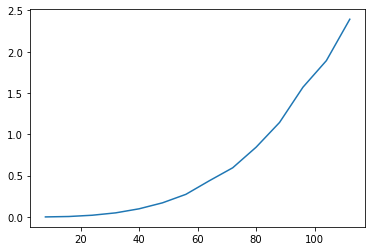

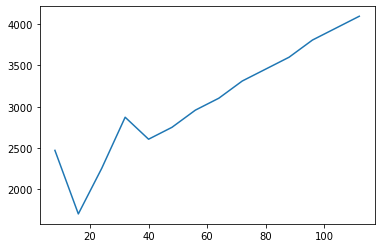

In [9]:
pattern = "GCACGACG"
seqs = [pattern*i for i in range(1,15)]
sizes = [len(pattern)*i for i in range(1,15)]
results = []
computation_list = [Nussinov.Simple_Nussinov(s, m=2) for s in seqs]
memorys = []
times = []
tracemalloc.start()
for c in computation_list:
    tracemalloc.clear_traces()
    t = time.process_time()
    c.Compute(print_loading=False)
    c.Compute_Traceback()
    results.append(c.structure)
    times.append(time.process_time()-t)
    memorys.append(tracemalloc.get_traced_memory()[1])
plt.figure(0)
plt.plot(sizes, times)
plt.figure(1)
plt.plot(sizes, memorys)
plt.show()

## Nussinov variant for a bunch of sequences

### Testing on sequences of small sizes

In [6]:
alignment = ["GC-C-AAA-GGC",
             "GGGC-AUU-GCC",
             "AC-GGAAUCCGU"]

print("Nussinov pour chaque alignement :")
computation_list = [Nussinov.Simple_Nussinov(seq, m=2) for seq in alignment]
for i, n in enumerate(computation_list):
    n.Compute()
    n.Compute_Traceback()
structures = [n.structure for n in computation_list]
for i in structures:
    print(i)
print("---------------")
computation_acc = Nussinov.Multiple_Nussinov(alignment, structures, m=2, method='MEA')
tracemalloc.start()
tracemalloc.clear_traces()
t1 = time.process_time()
computation_acc.ACC_Compute()
t1 = time.process_time()-t1
m1 = tracemalloc.get_traced_memory()[1]
tracemalloc.clear_traces()
t2 = time.process_time()
computation_acc.Compute_Nussinov_ACC()
t2 = time.process_time()-t2
m2 = tracemalloc.get_traced_memory()[1]
tracemalloc.clear_traces()
t3 = time.process_time()
computation_acc.Compute_Traceback()
t3 = time.process_time()-t2
m3 = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
print(computation_acc.structure)
for s, t, m in [('ACC', t1, m1), ('matrix', t2, m2), ('traceback', t3, m3)]:
    print(f"Time to compute {s} : {round(t, 5)}s")
    print(f"Memory used for {s} : {round(m/1024, 5)}kb")

Nussinov pour chaque alignement :
(((...)))
((.(...)))
((((...))))
---------------
.((((...))))
Time to compute ACC : 0.0011s
Memory used for ACC : 11.22949kb
Time to compute matrix : 0.00273s
Memory used for matrix : 11.22949kb
Time to compute traceback : 3.83253s
Memory used for traceback : 17.21875kb


### Testing on a way much larger bunch of sequences

In [109]:
# Extraction of the sequences from RF00100.stockholm.txt
alignment = []
with open("data/RF00100.stockholm.txt", 'r') as file:
    file.readline(); file.readline()
    while file.readline()[0]=='#':
        pass
    file.readline()
    test, seq = file.readline().split(' ', 1)
    while test[0]!='#':
        while seq[0] == ' ':
            seq = seq[1:]
        alignment.append(seq.replace('\n', ''))
        test, seq = file.readline().split(' ', 1)
    cons = seq.split(' ', 1)[1].replace('<', '(').replace('>', ')').replace(',', '.').replace('_', '-')
    while cons[0] == ' ':
        cons = cons[1:]
with open("data/bunch_of_sequences.txt", 'w+') as file:
    for a in alignment:
        file.write(a + '\n')
    file.write(cons)

#### /!\ WARNING /!\

The cell below is very long to execute

In [113]:
#Now compute Nussinov
print("Nussinov pour chaque alignement :")
computation_list = [Nussinov.Simple_Nussinov(seq, m=2) for seq in alignment]
for i, n in enumerate(computation_list):
    print('='*int(i/len(computation_list)*10)+'-'*int((1-i/len(computation_list))*10), end='\r')
    n.Compute()
    n.Compute_Traceback()
structures = [n.structure for n in computation_list]
for i in structures:
    print(i)
print("---------------")
computation_acc = Nussinov.Multiple_Nussinov(alignment, structures, m=2, method='MTA')
tracemalloc.start()
tracemalloc.clear_traces()
t1 = time.process_time()
computation_acc.ACC_Compute()
t1 = time.process_time()-t1
m1 = tracemalloc.get_traced_memory()[1]
tracemalloc.clear_traces()
t2 = time.process_time()
computation_acc.Compute_Nussinov_ACC()
t2 = time.process_time()-t2
m2 = tracemalloc.get_traced_memory()[1]
tracemalloc.clear_traces()
t3 = time.process_time()
computation_acc.Compute_Traceback()
t3 = time.process_time()-t2
m3 = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
print(computation_acc.structure)
for s, t, m in [('ACC', t1, m1), ('matrix', t2, m2), ('traceback', t3, m3)]:
    print(f"Time to compute {s} : {round(t, 5)}s")
    print(f"Memory used for {s} : {round(m/1024, 5)}kb")

Nussinov pour chaque alignement :
.((((.(((..)(..)((((..(((((..))(((((((((..)).)...)))).))).))))((.(((((.((.(((((.((.(..)))..)))((((.((.(((((((.((((((((((((((.((.(..)))))))..)).).)))))((((((...))).((..((.((..))))))))))))(((.((((..)))((...)))))).))(((((...))(((((..).(((..))(..))))))))))))..))))))).)).))(((((..))).)))))))))))))))((.(.(.(((((((..)).))).).))))))).
((((((((((((((((.(....)))((..))))(((((((..)(((((..)((..)..)).).)))(((.(..)).))).))))).))).)((((((((.((.(((((((.((((((((((((((.((.(..)))))))..)).).)))))((((((...)).)(((((((..)))).).))))))))((((..))((.(((...)))))))))(((((...))(((((..)((..))(..).))))))))))..))))))).))(((.((((..))).))).))))))))))(((..((((((((((..)).))))..))))..))).
(((((((...)(.(((((.(((((((..))))(((((((..))((((..))(((.(((((((((..)(((.((.((((.(((.(..)))..)).)..).))))).))).)(.((((((((((((.((.(..)))))))..)).).))))))))(((...)))((((((.((((((..)((.(..)))))((..)((((...)).))))))))).)))))))((((((((..).(((..))(..)))).).)))))))).))))).).))(((((..))).))))))))))))))(((.(((((((((

In [114]:
print(len("GGAUGUGA-GG-GUGAUCUGGCUGCGACAUCUG-UCA-CC--CCAUUGAUCGCCAGGGUUAAU----UUGGCU-GAUCUGGCUGGC-UAGGCGGGU-GUCCCCU--UCCUCCCUCACCGCUCCAUGUGCGUCCCUCCCGAAGCUGCAC-------GCUCGG-UGGAAGAGGAUGACA-UCC---CAGG--UAU-AGAA------GA--AGUGUACUGAGGUCUCCAG------UCUUUGGUCCCGGGUAUACGA-UAG-CUGC--GCUCUCUUGCUAGAACCUCCA---AACAAG--CUCAA-GGUCCAUUU---GUAGGAGA-ACGUAGGGUACUC-AG-A----------------------UAUUAUAGAAUUGU-ACUUU--CAGUUC-CUAUUAAUA"))

402


In [11]:
for i in range(1000000):
    if i%10000==0: print(i, end='\r')